## Task : 1

### TITANIC SURVIVAL PREDICTION

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

* PassengerId: A unique identifier assigned to each passenger.
* Survived: Indicates whether the passenger survived (1) or not (0).
* Pclass: Ticket class, representing the socio-economic status of the passenger. It's categorized as 1st, 2nd, or 3rd class.
* Name: Name of the passenger.
* Sex: Gender of the passenger.
* Age: Age of the passenger.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Ticket: Ticket number.
* Fare: Fare paid by the passenger.
* Cabin: Cabin number.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [149]:
df=pd.read_csv(r"C:\Users\M.JOTHI\OneDrive\Desktop\bridge course\CODSOFT internship\data science project\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [151]:
df.shape

(891, 12)

In [152]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Dropping the redundant columns

In [155]:
# df=df.drop(columns=["PassengerId","Name","Ticket","Cabin"])

In [156]:
# df.head()

In [157]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 5 point summary

## Numerical

In [158]:
df.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


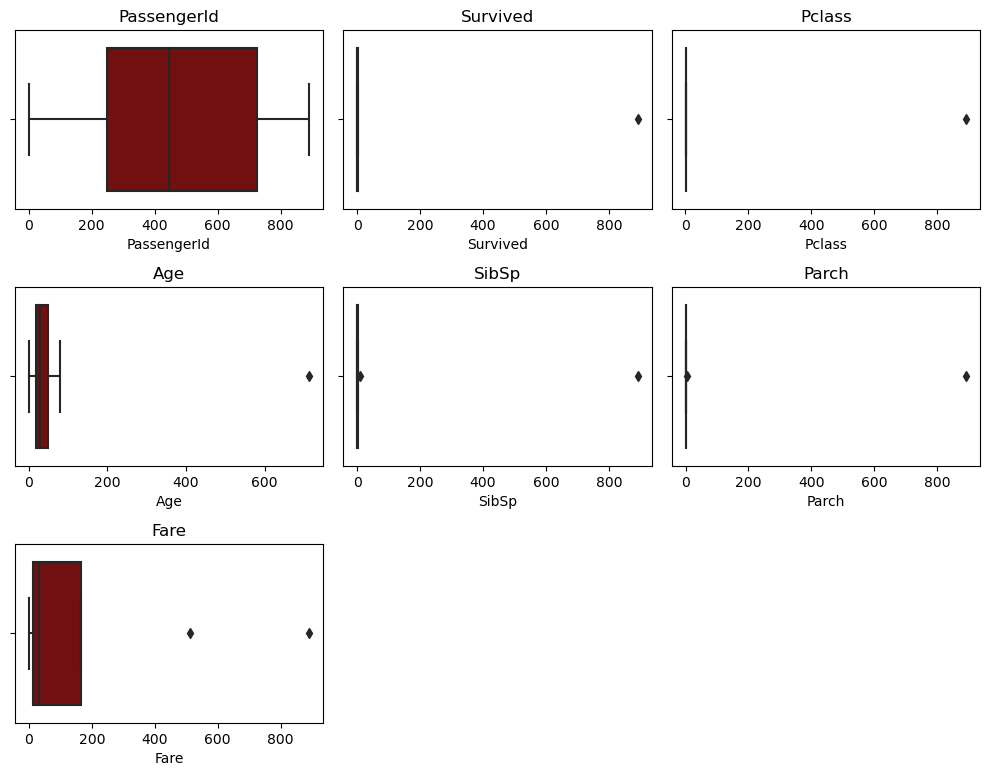

In [159]:
plt.rcParams['figure.figsize']=10,10
t=1
for i in num_cols:
    plt.subplot(4,3,t)
    sns.boxplot(x=num_cols[i],color ='maroon')
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

## Categorical

In [160]:
cat_cols=df.select_dtypes(include='object')
cat_cols

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [161]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


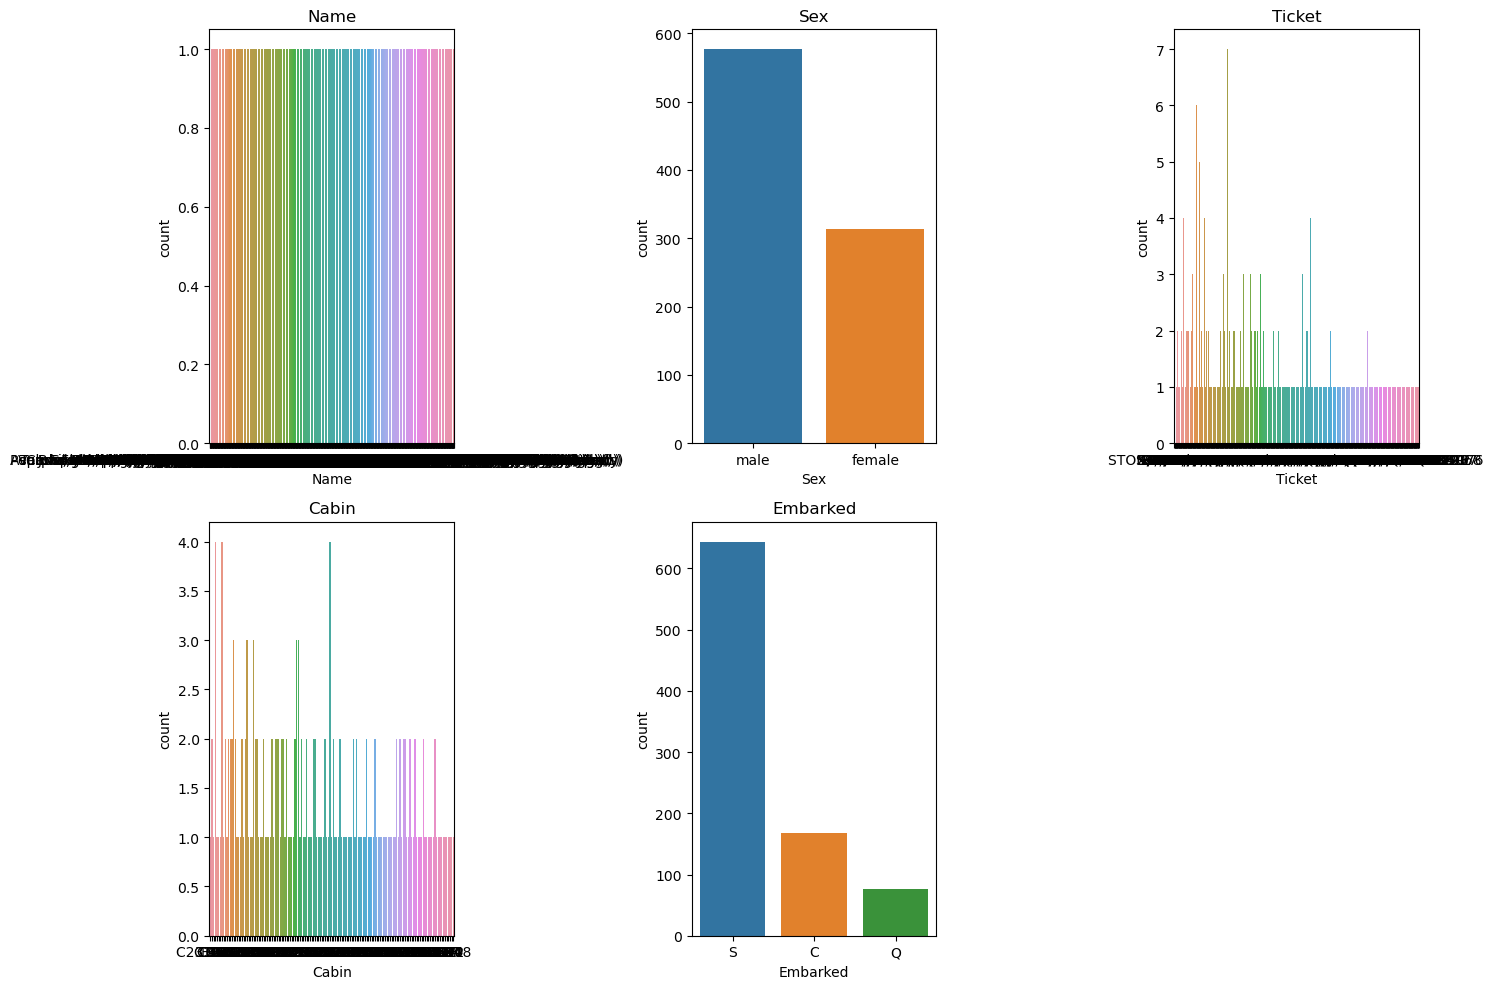

In [162]:
t=1
plt.figure(figsize=(15,10))
for i in df.select_dtypes(include='object'):
    plt.subplot(2,3,t)
    sns.countplot(x=df[i])
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

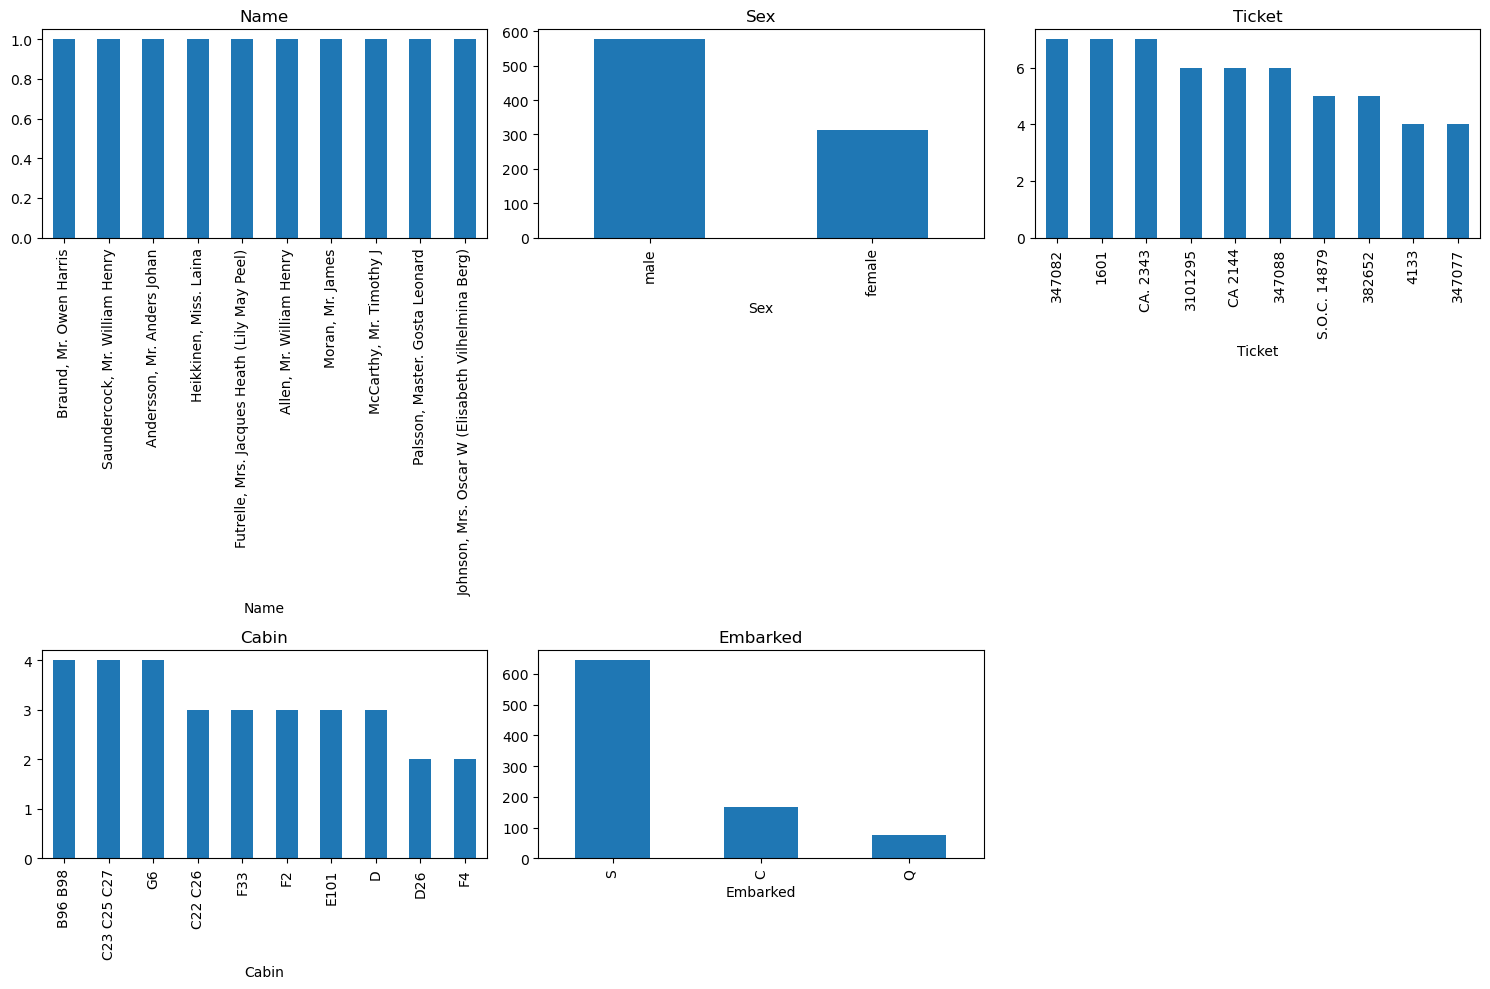

In [163]:
t=1
plt.figure(figsize=(15,10))
for i in df.select_dtypes(include='object'):
    plt.subplot(2,3,t)
    df[i].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

## Missing values

In [164]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [165]:
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [166]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

## Univariate Analysis

In [167]:
corr=df.select_dtypes(include='number').corr()

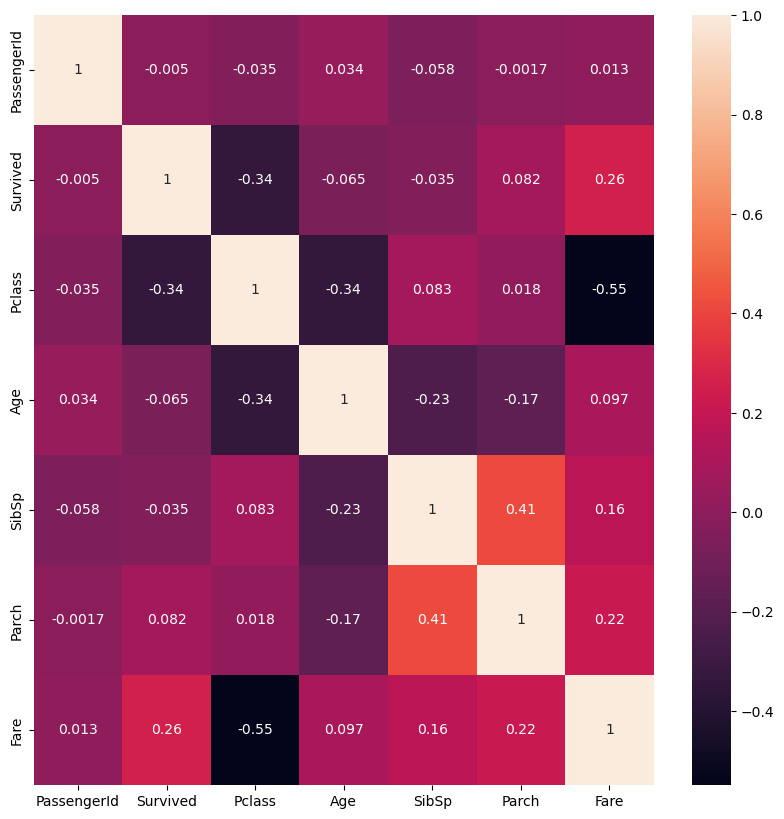

In [168]:
sns.heatmap(corr,annot=True)
plt.show()

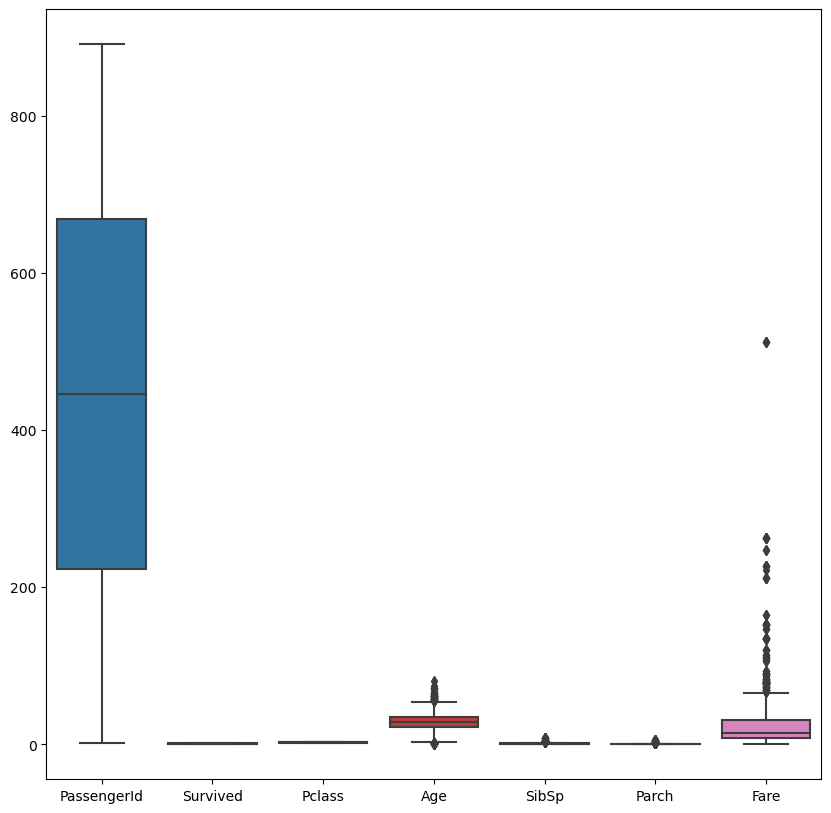

In [169]:
sns.boxplot(df)
plt.show()

Mean: 446.0
Median: 446.0
Mode: 1
Skewness: 0.0
kurtosis: -1.1999999999999997
Mean: 0.3838383838383838
Median: 0.0
Mode: 0
Skewness: 0.4785234382949897
kurtosis: -1.775004671066304
Mean: 2.308641975308642
Median: 3.0
Mode: 3
Skewness: -0.6305479068752845
kurtosis: -1.2800149715782825
Mean: 29.36158249158249
Median: 28.0
Mode: 28.0
Skewness: 0.5102446555756495
kurtosis: 0.9938710163801736
Mean: 0.5230078563411896
Median: 0.0
Mode: 0
Skewness: 3.6953517271630565
kurtosis: 17.880419726645968
Mean: 0.38159371492704824
Median: 0.0
Mode: 0
Skewness: 2.7491170471010933
kurtosis: 9.778125179021648
Mean: 32.204207968574636
Median: 14.4542
Mode: 8.05
Skewness: 4.787316519674893
kurtosis: 33.39814088089868


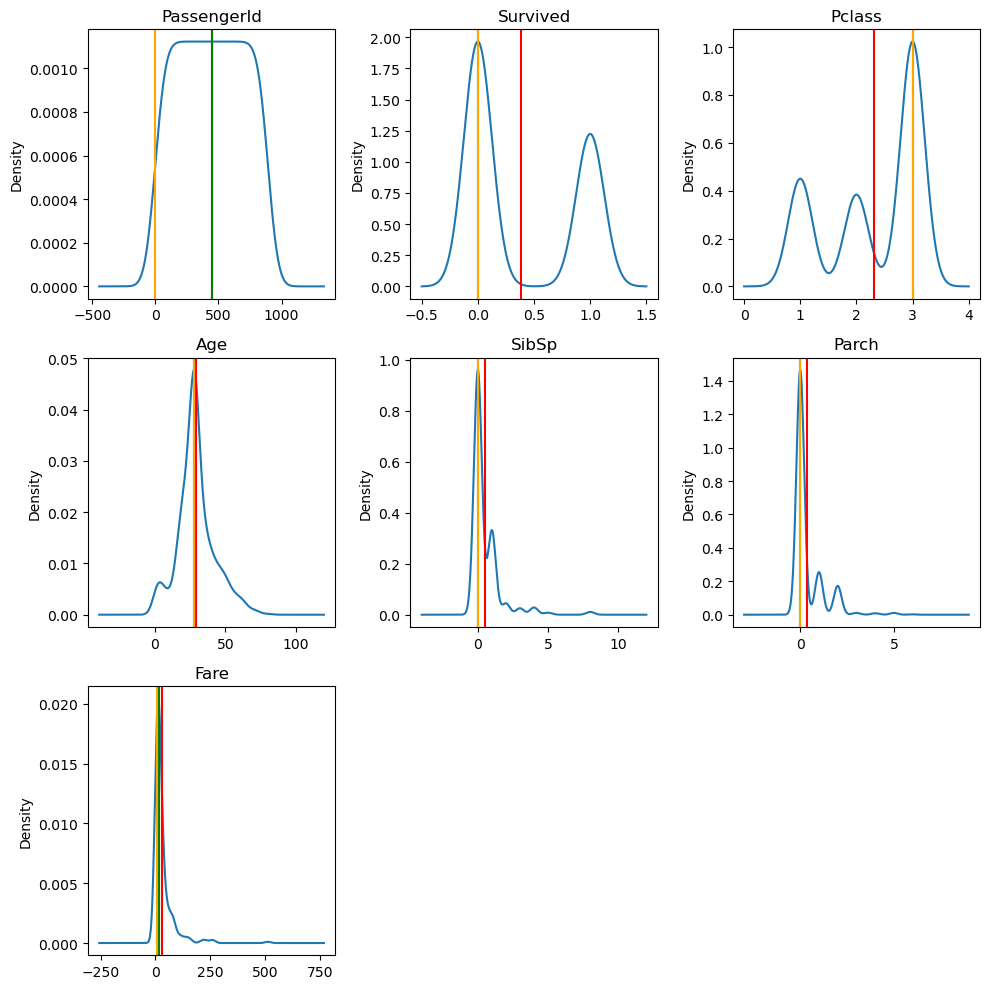

In [170]:
t=1
for i in df.select_dtypes(include='number'):
    plt.subplot(3,3,t)
    df.select_dtypes(include='number')[i].plot(kind='kde')
    plt.axvline(df.select_dtypes(include='number')[i].mean(),color='red')
    plt.axvline(df.select_dtypes(include='number')[i].median(),color='green')
    plt.axvline(df.select_dtypes(include='number')[i].mode()[0],color='orange')
    print('Mean:',df.select_dtypes(include='number')[i].mean())
    print('Median:',df.select_dtypes(include='number')[i].median())
    print('Mode:',df.select_dtypes(include='number')[i].mode()[0])
    print('Skewness:',df.select_dtypes(include='number')[i].skew())
    print('kurtosis:',df.select_dtypes(include='number')[i].kurt())
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

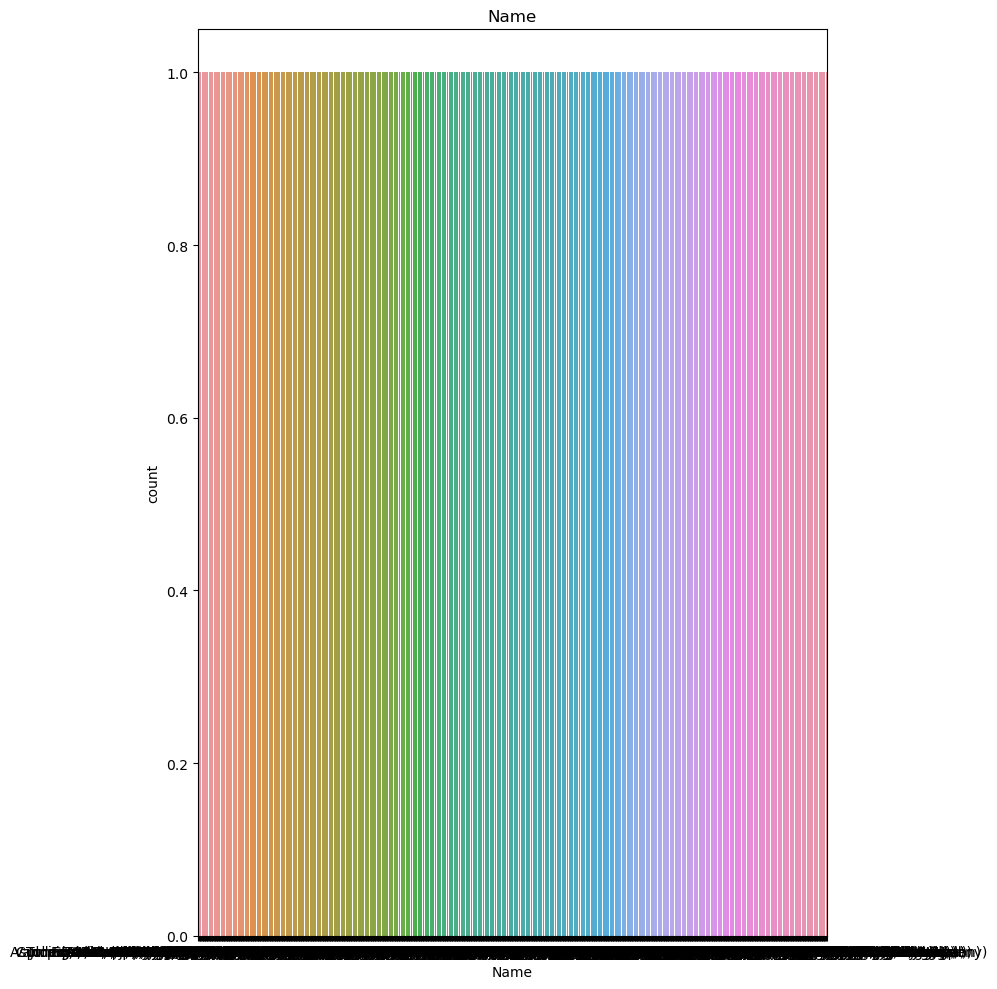

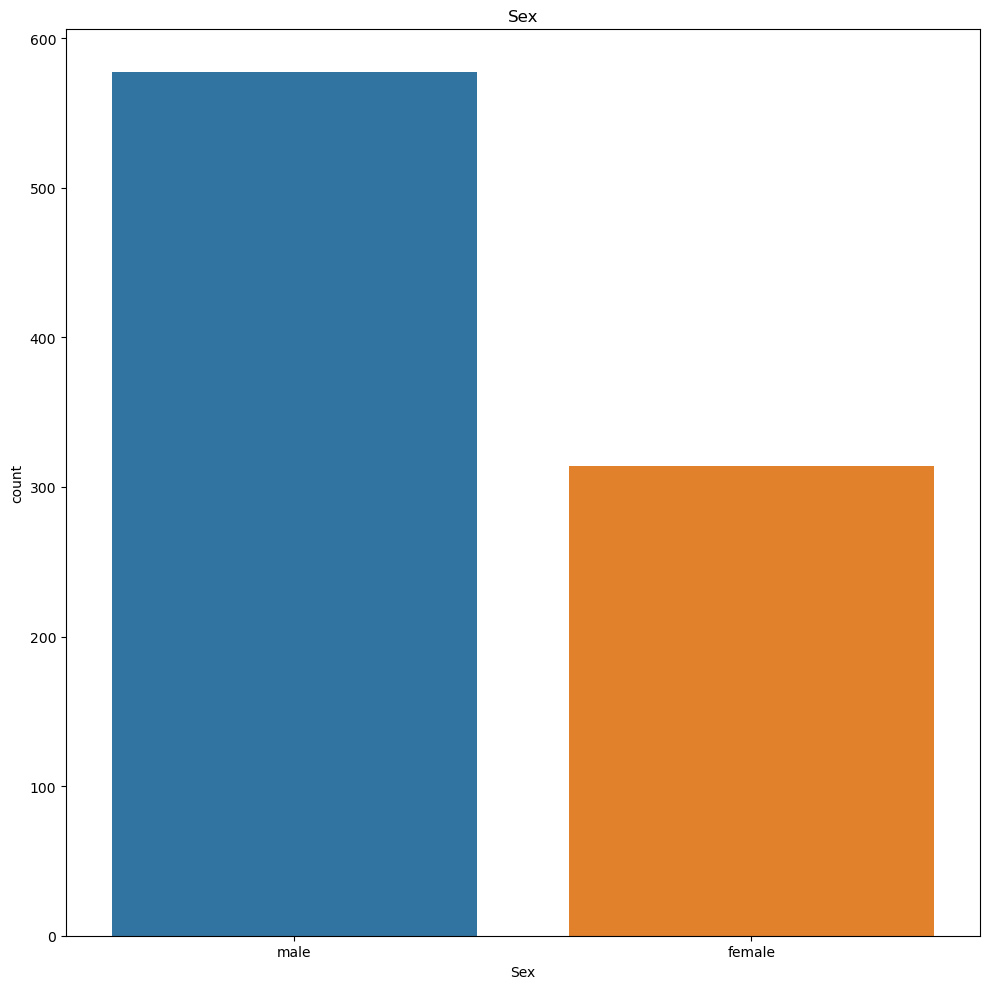

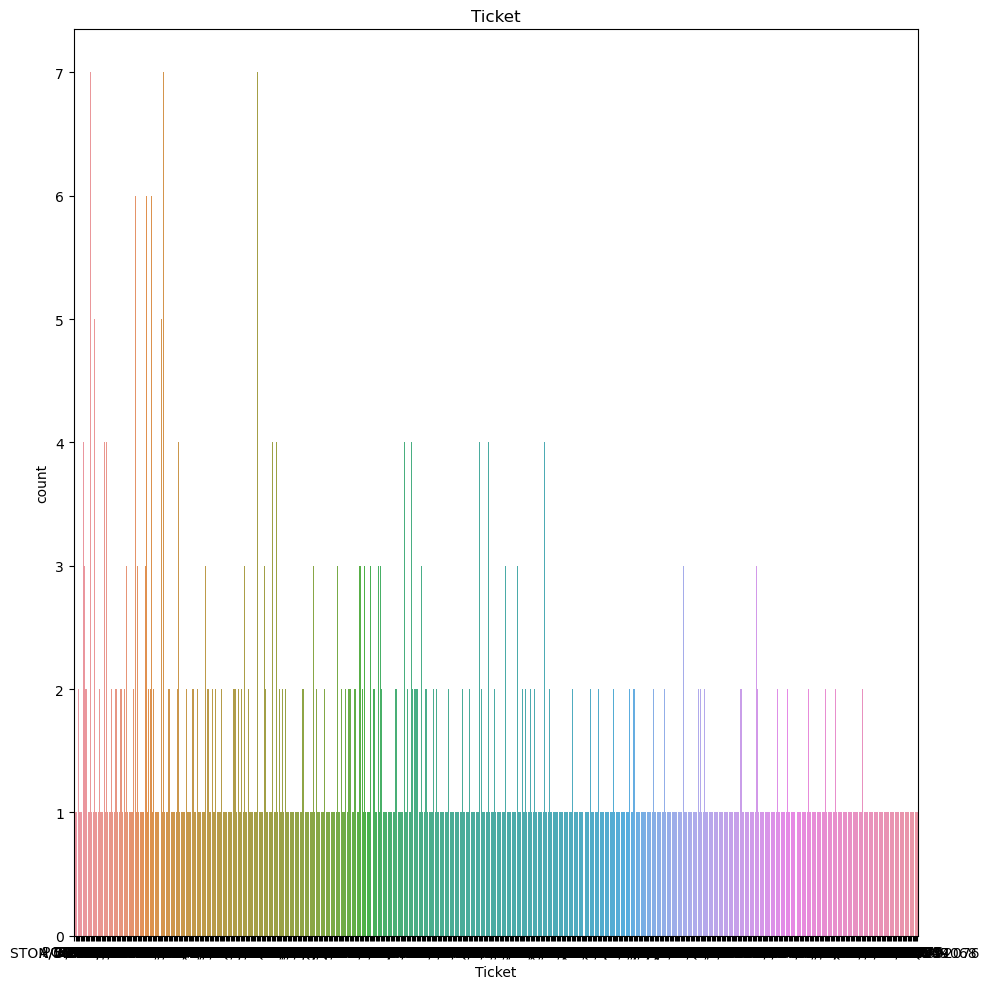

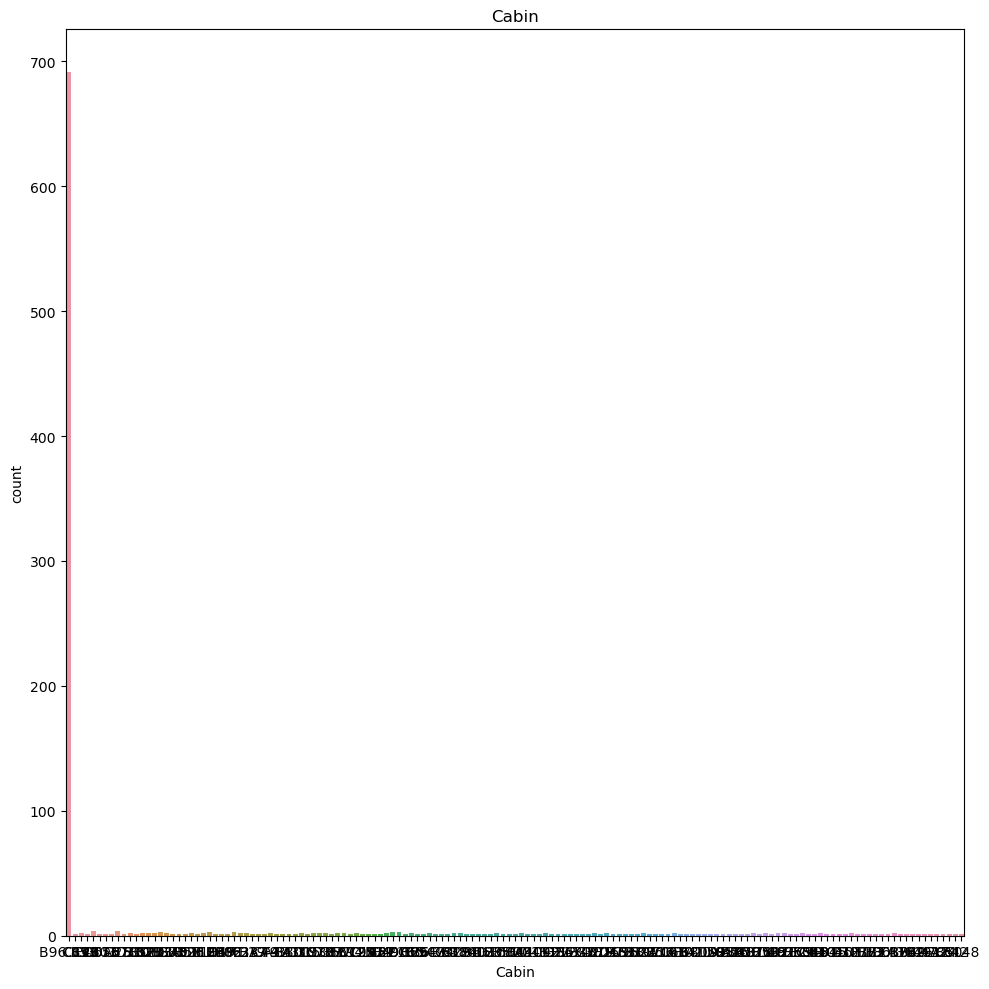

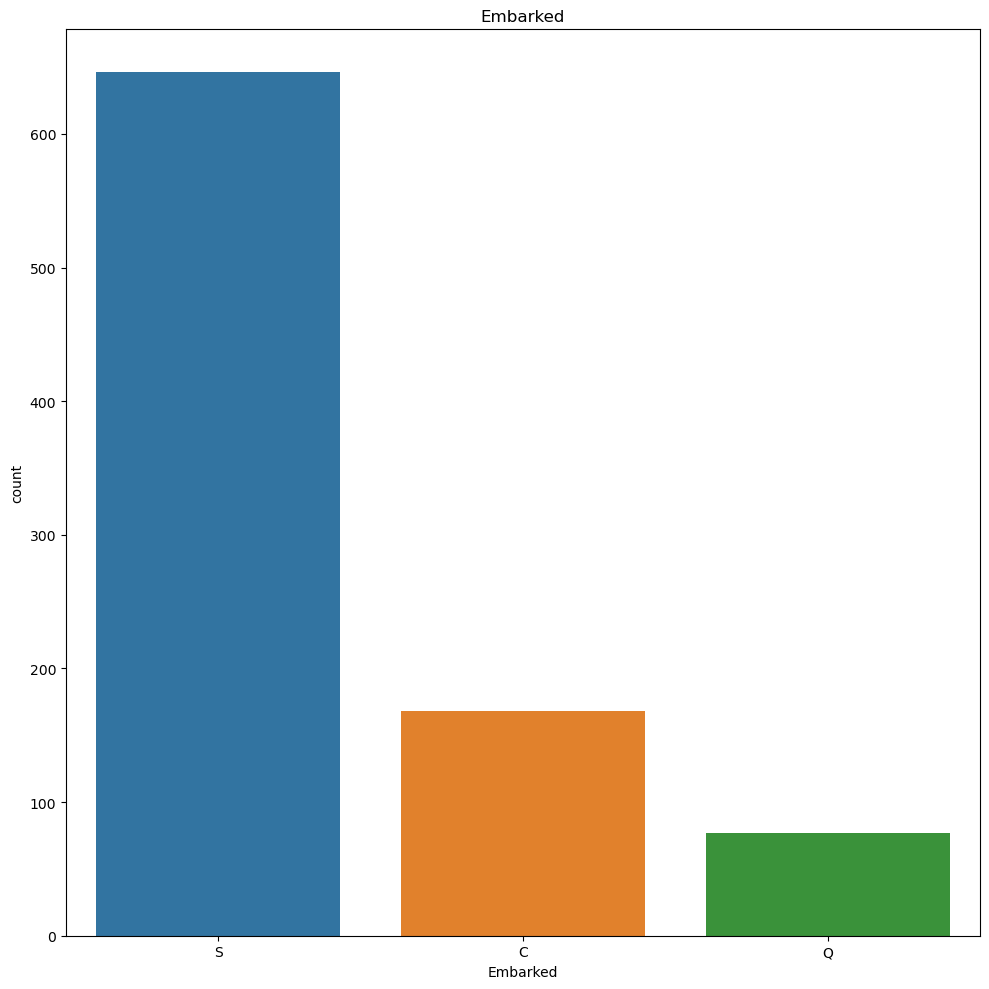

In [171]:
for i in df.select_dtypes(include='object'):
    sns.countplot(x=df.select_dtypes(include='object')[i])
    plt.title(i)
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

In [172]:
del df['PassengerId']

In [173]:
del df['Name']

In [174]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

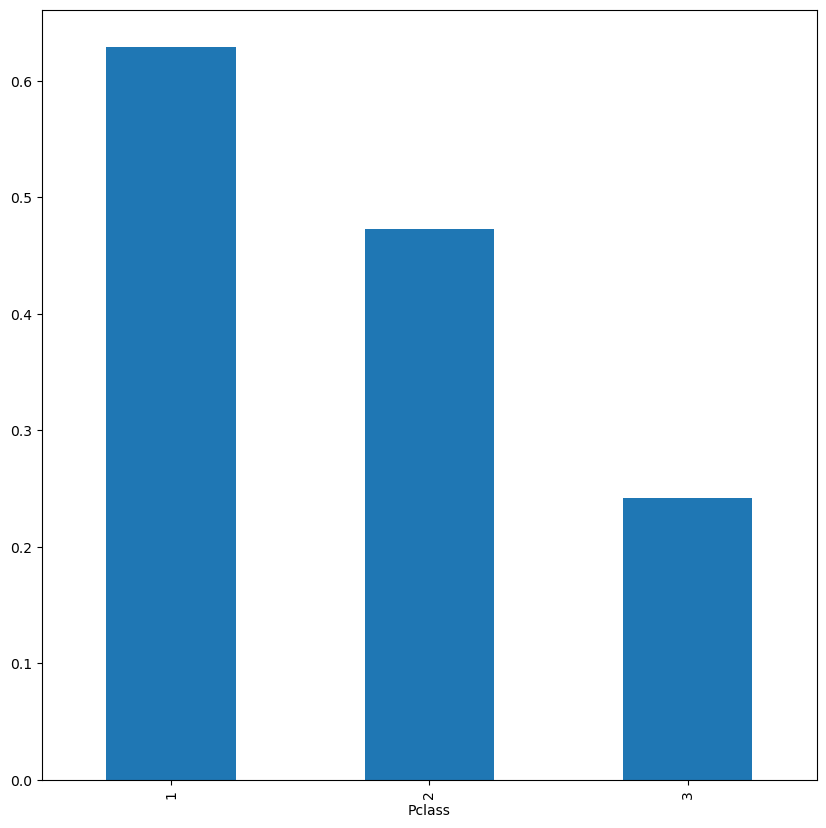

In [175]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.show()

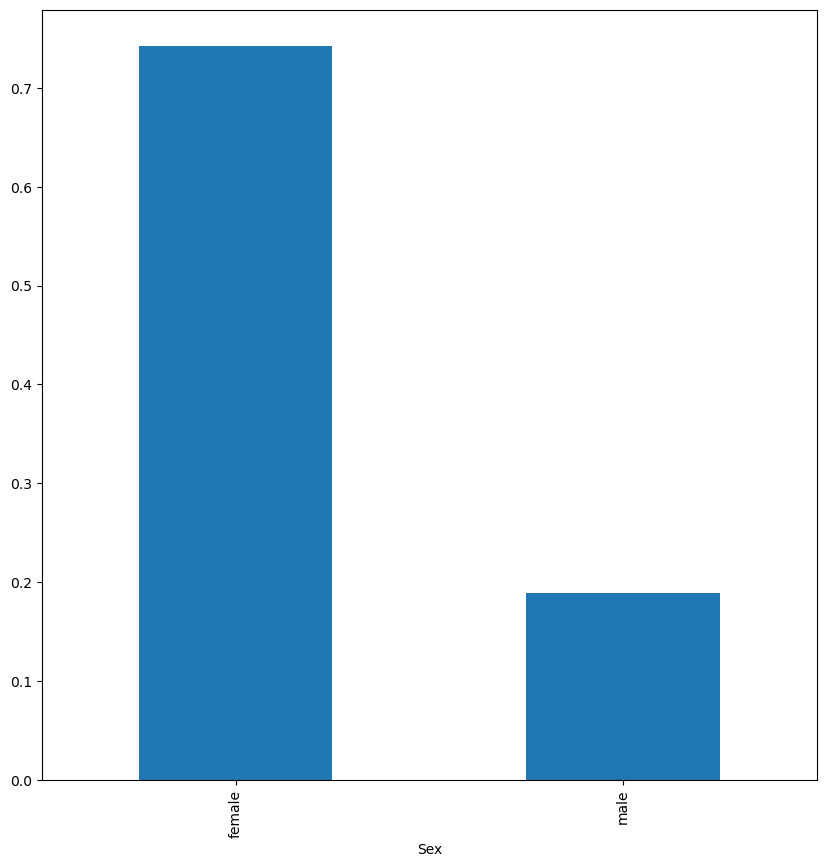

In [176]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.show()

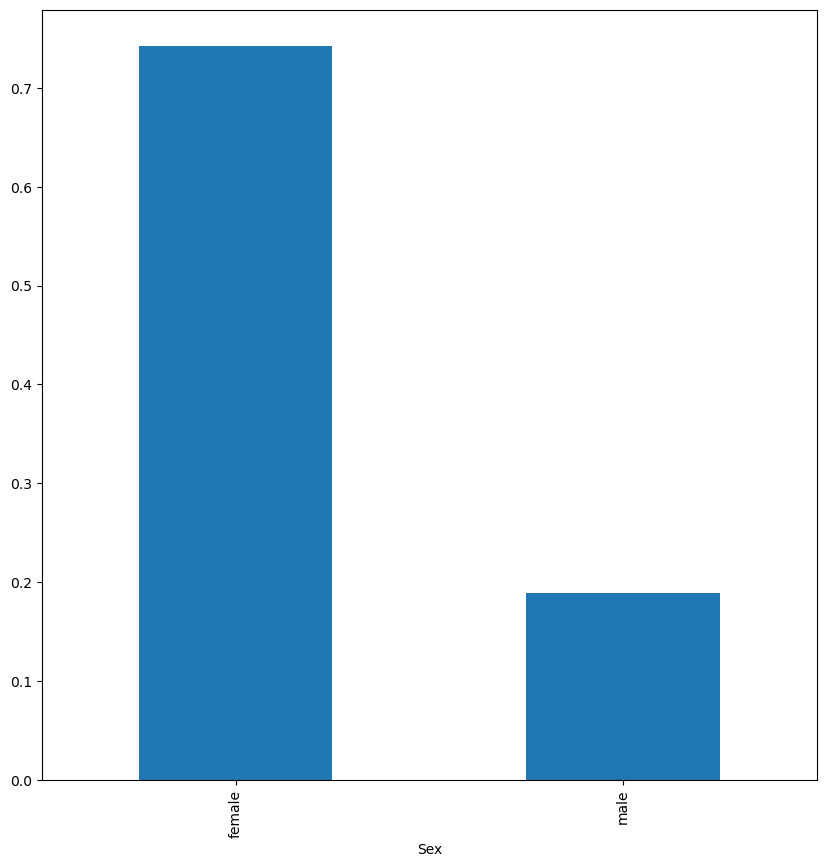

In [177]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.show()

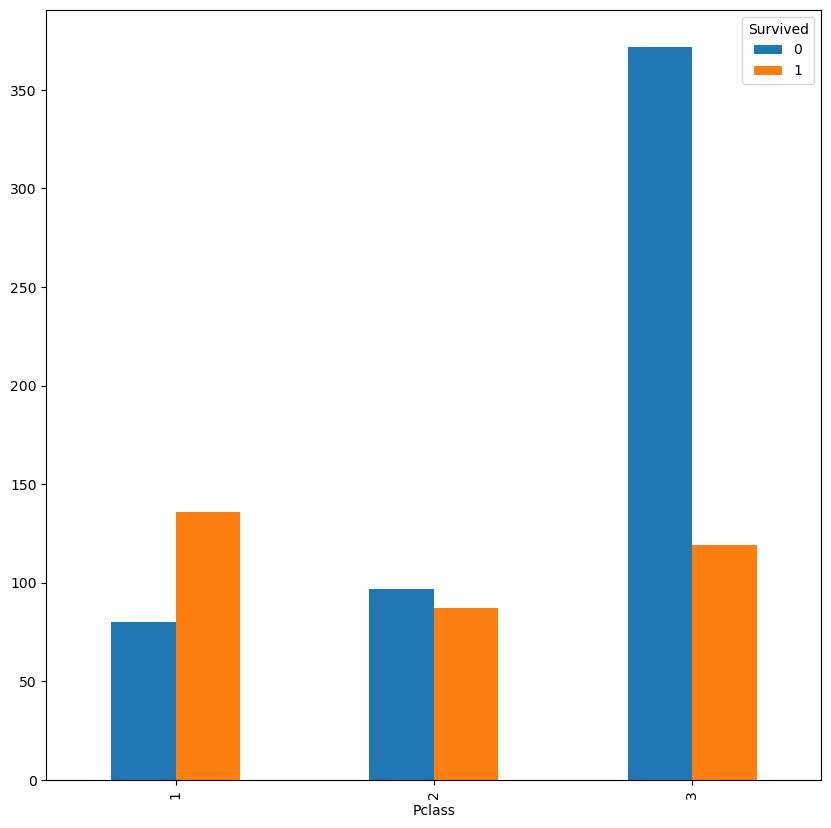

In [178]:
pd.crosstab(index =df['Pclass'],columns =df['Survived']).plot(kind='bar')
plt.show()

In [179]:
pd.crosstab(index =df['Embarked'],columns =df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


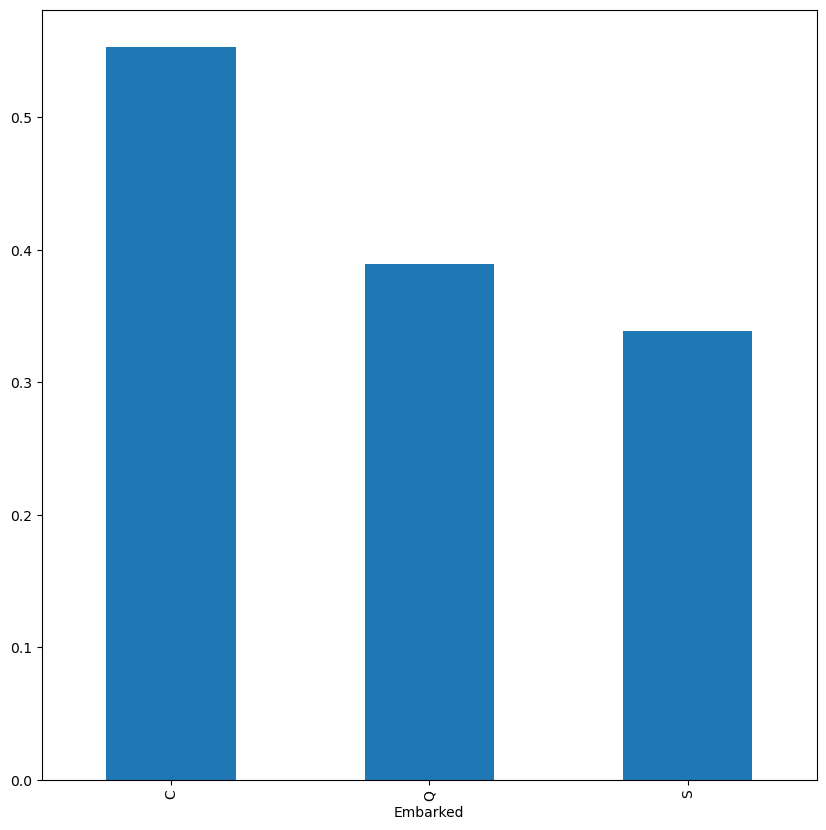

In [180]:
df.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.show()

## Multivariate Analysis

In [181]:
df.groupby('Sex')[['Age','Fare']].mean()

,Age,Fare
Sex,,
female,27.929936,44.479818
male,30.140676,25.523893


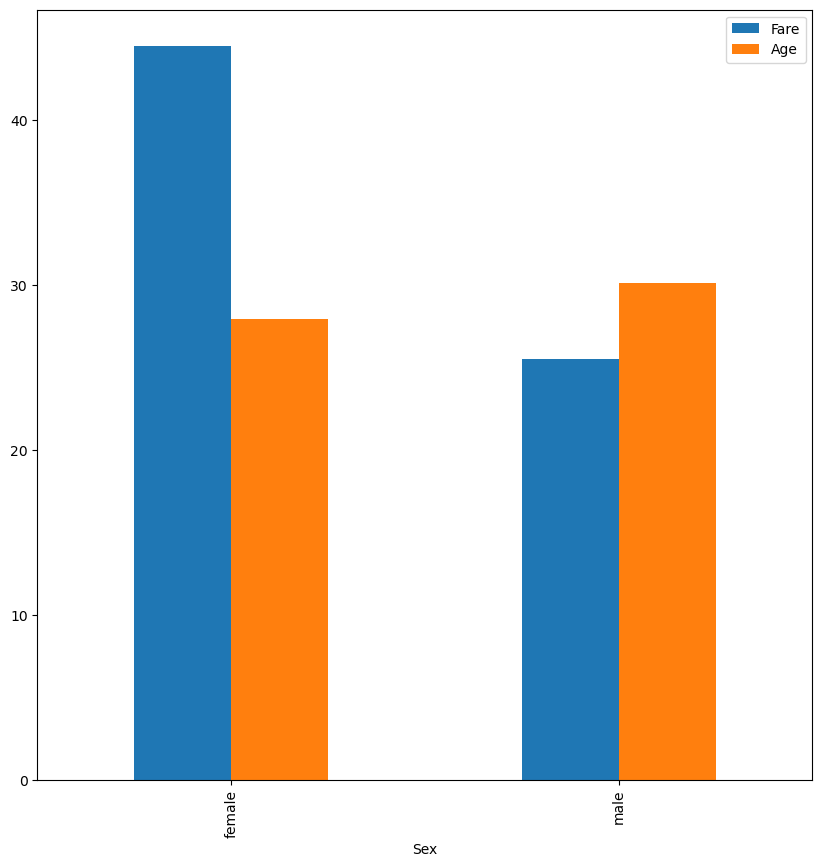

In [182]:
df.groupby('Sex')[['Fare','Age']].mean().plot(kind='bar')
plt.show()

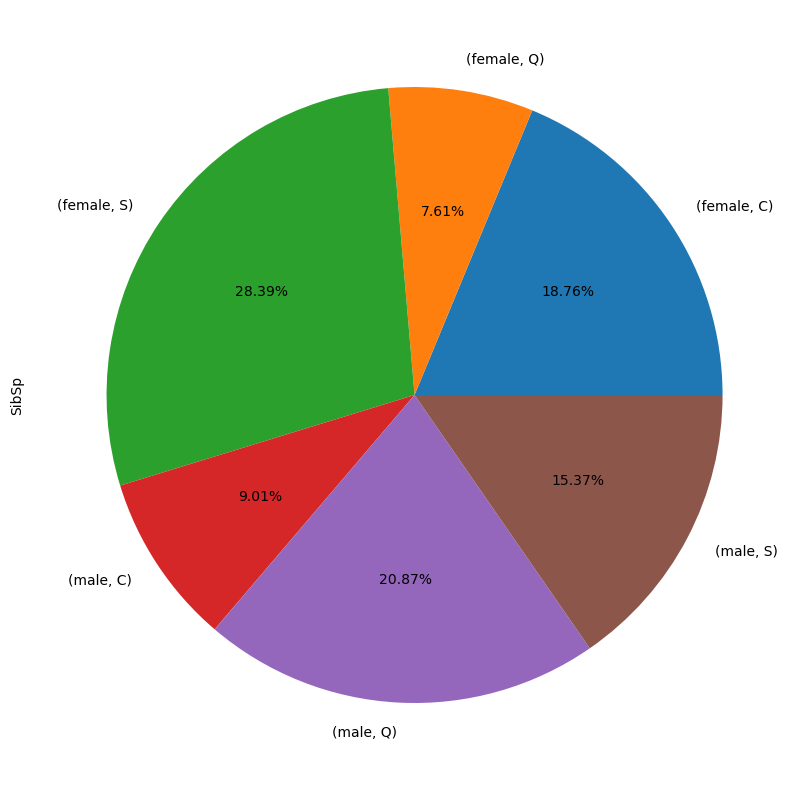

In [183]:
df.groupby(['Sex','Embarked'])['SibSp'].mean().plot(kind='pie',autopct='%.2f%%')
plt.show()

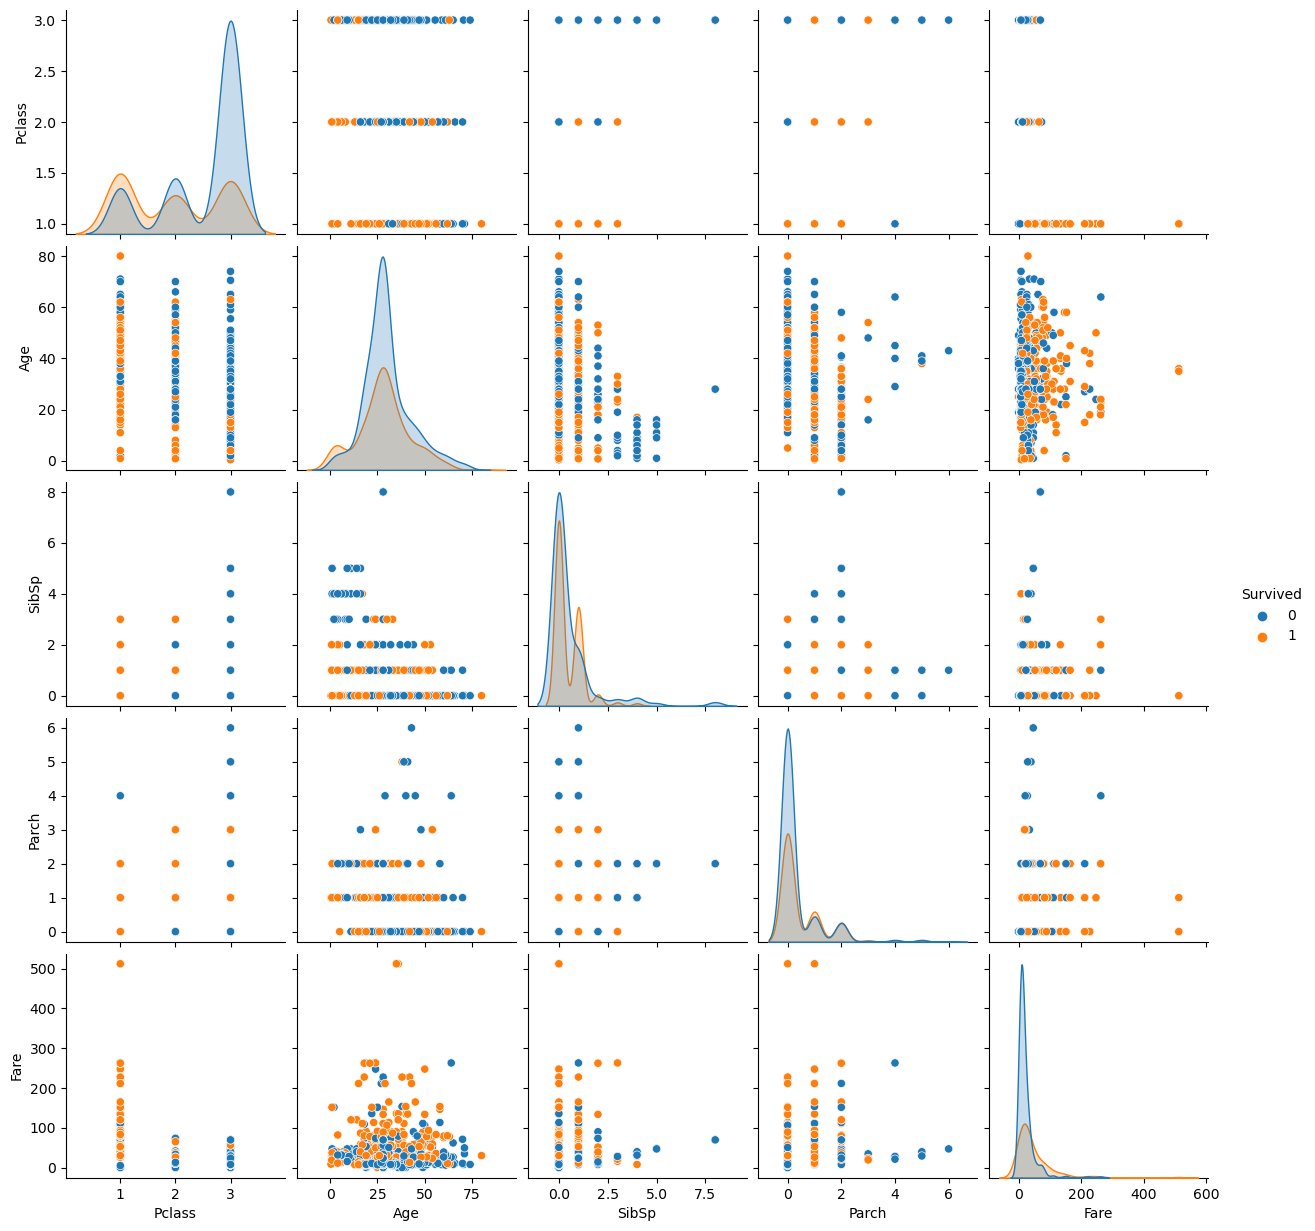

In [184]:
sns.pairplot(df,hue='Survived')
plt.show()

## Outliers

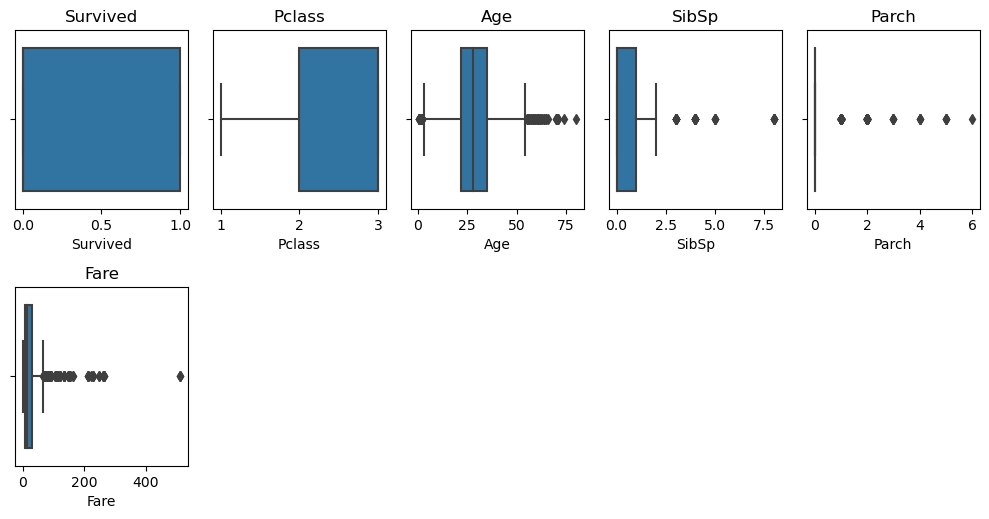

In [185]:
t=1
plt.figure(figsize=(10,10))
for i in df.select_dtypes(include='number'):
    plt.subplot(4,5,t)
    sns.boxplot(x=df[i])
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

In [28]:
for i in df.select_dtypes(include=np.number):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    df[i] = np.where(df[i] > ul, ul, df[i])
    df[i] = np.where(df[i] < ll, ll, df[i])

## Encoding

In [186]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [143]:
df=pd.get_dummies(df[,drop_first=True)

In [144]:
df.replace({True: 1, False: 0}, inplace=True)

In [145]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Ticket_110413,Ticket_110465,Ticket_110564,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[['Ticket','Cabin']]

In [190]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### Model building

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
x=df.drop('Survived',axis=1)
y=df['Survived']
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.3,stratify=y,random_state=2)

In [36]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(623, 8)
(268, 8)
(623,)
(268,)


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
model

LogisticRegression()

In [39]:
y_pred =model.predict(xtest)
print(y_pred)

[0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 0.]


In [40]:
b0=model.intercept_
print(b0)

b1 = model.coef_
print(b1)

[4.68412496]
[[-1.00999701 -2.61039897 -0.04226303 -0.32902805  0.          0.00998223
   0.11213723 -0.20913818]]


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, cohen_kappa_score,roc_auc_score
from sklearn.metrics import roc_curve

In [43]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       165
         1.0       0.72      0.75      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [44]:
print(accuracy_score(ytest, y_pred))

0.7910447761194029


## Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

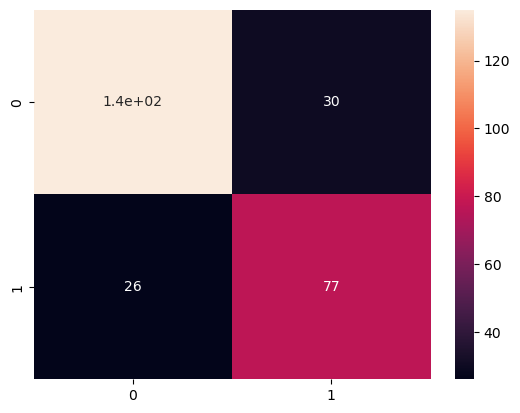

In [46]:
cm =confusion_matrix(ytest,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [47]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

## recall


In [48]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.7475728155339806

## precision

In [49]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.719626168224299

## Specificity

In [50]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.8181818181818182

## F1 Score

In [51]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.7333333333333333

## Accuracy

In [52]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy


0.7910447761194029

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [54]:
def model_validation(model,xtrain,ytrain,xtest,ytest):
    global m
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)  # Hard Prediction (0,1)
    prob = m.predict_proba(xtest)[:,1] # Soft prediction (probability of 1)
    
    print('Accuracy:',accuracy_score(ytest,pred))
    print('Confussion Matrix:\n',confusion_matrix(ytest,pred))
    print('Report:\n',classification_report(ytest,pred))
    print('Cohen Kappa Score:',cohen_kappa_score(ytest,pred))
    
    fpr,tpr,thres = roc_curve(ytest,prob)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red')
    plt.title(f'AUC SCORE {roc_auc_score(ytest,prob)}')

Accuracy: 0.7910447761194029
Confussion Matrix:
 [[138  27]
 [ 29  74]]
Report:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       165
         1.0       0.73      0.72      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

Cohen Kappa Score: 0.5568416701116163


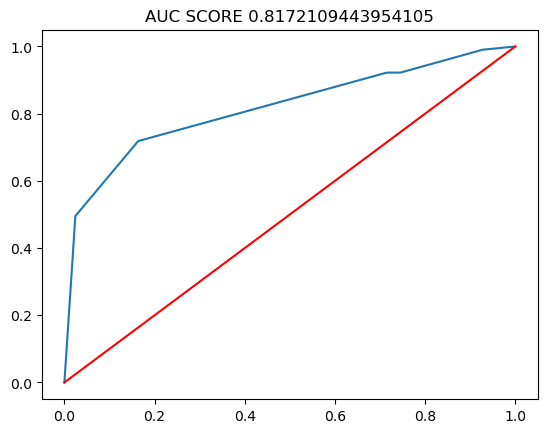

In [55]:
model_validation(DecisionTreeClassifier(criterion='entropy',max_depth=3),
                xtrain,ytrain,xtest,ytest)

## Gaussian 

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


dt_default = GaussianNB()
dt_default.fit(xtrain, ytrain)

GaussianNB()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = dt_default.predict(xtest)

# Printing classification report
print(classification_report(ytest, y_pred))
print(accuracy_score(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79       165
         1.0       0.66      0.76      0.71       103

    accuracy                           0.76       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.77      0.76      0.76       268

0.7574626865671642


## Cohenkappa

In [141]:
cohen_kappa_score(ytest, y_pred)

0.5011454753722795

## XGBooster

In [142]:
from xgboost.sklearn import XGBClassifier

In [143]:
xgb_model = XGBClassifier(n_estimators=250).fit(xtrain,ytrain)

In [144]:
y_pred = xgb_model.predict(xtest)

# Printing classification report
print(classification_report(ytest, y_pred))
print(accuracy_score(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       165
         1.0       0.71      0.75      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

0.7873134328358209
